# Linear Regression - Medical Insurance

In [51]:
# Importing Libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt


import pickle
import json

import warnings
warnings.filterwarnings('ignore')

# 1. Problem Statement

Given a medical insurance dataset consisting of various features such as age, sex, BMI, number of children, smoking status, region, and charges, the objective is to build a machine learning model using linear regression that accurately predicts the insurance charges for a given set of features.

The model should be able to capture the relationship between the features and the charges and provide a reliable prediction for new, unseen data.

The model's performance will be evaluated based on its ability to minimize the mean squared error between the actual and predicted charges.

# 2. Data Gathering

In [2]:
# Data Gathering or Read data from csv file

df = pd.read_csv('medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Checking info of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Checking description of dataframe

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 3. EDA/ Data Cleaning

In [11]:
# Checking for null values

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot: >

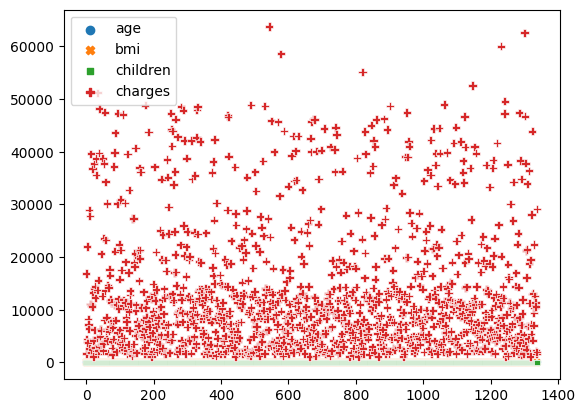

In [6]:
# Checking distribution of Data points

sns.scatterplot(df)

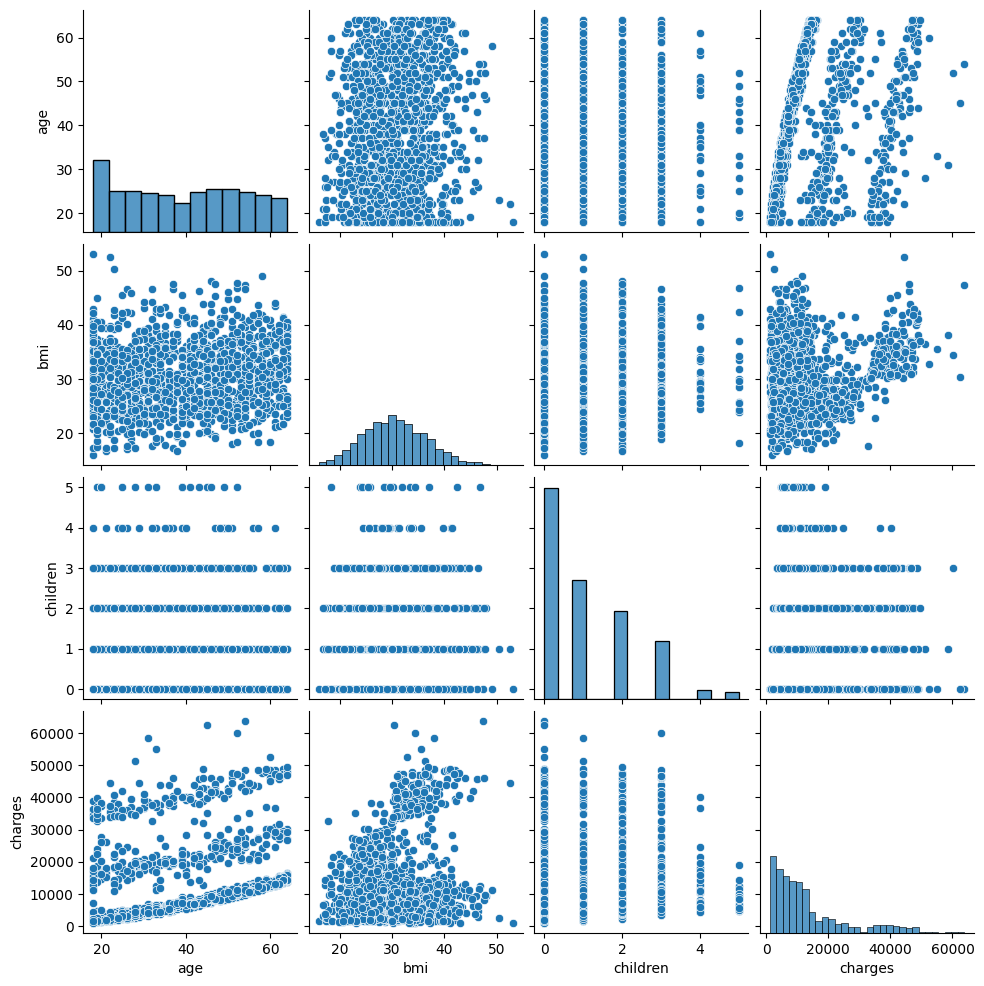

In [7]:
# Checking linear relationship between data points

sns.pairplot(df)

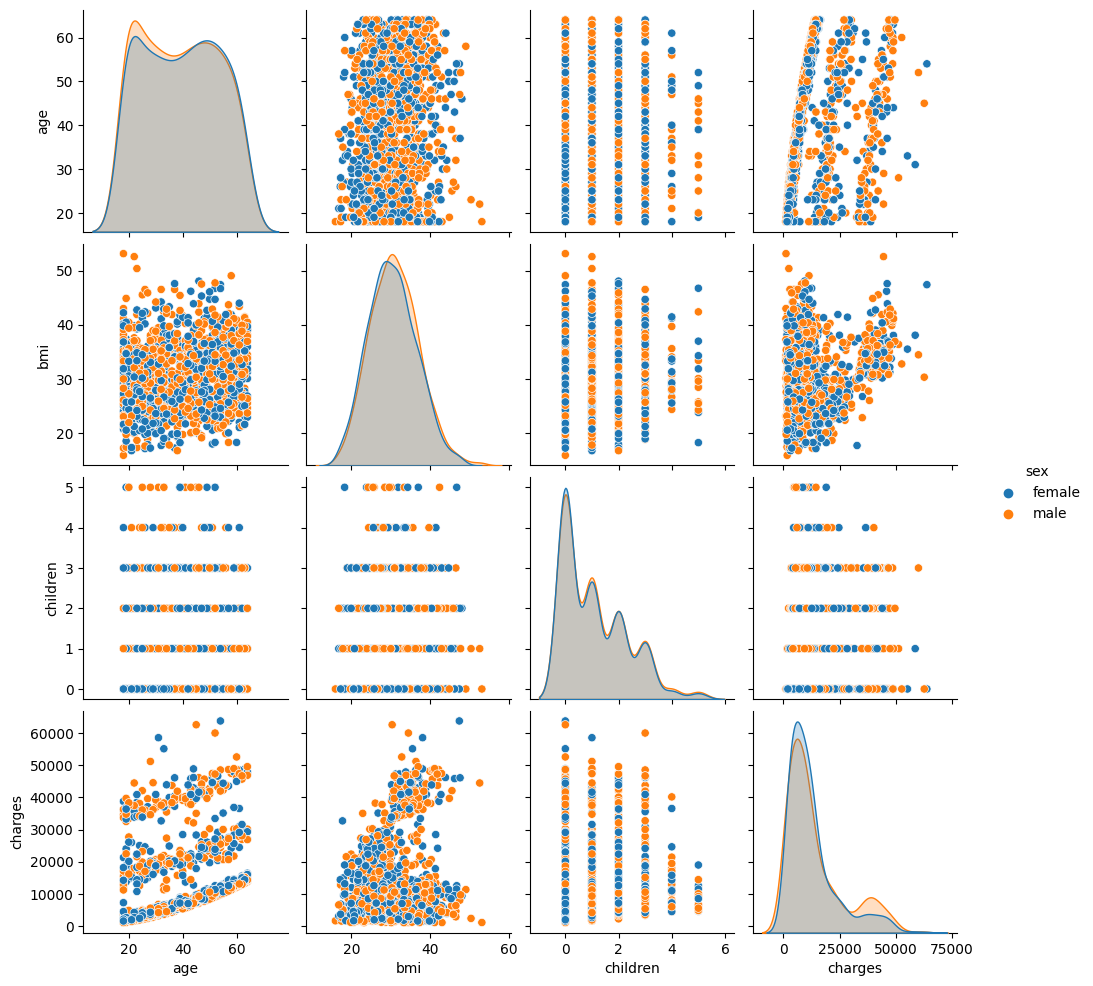

In [10]:
sns.pairplot(df, hue='sex')

In [12]:
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

<AxesSubplot: >

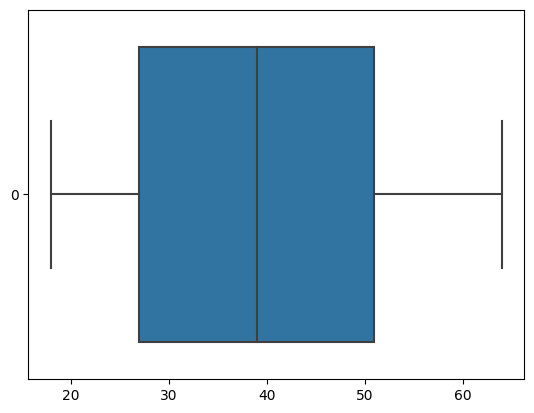

In [13]:
sns.boxplot(df['age'], orient='h')

In [14]:
df['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [15]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [16]:
df['sex'].replace({'female':0,'male':1}, inplace=True)

In [17]:
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

<AxesSubplot: >

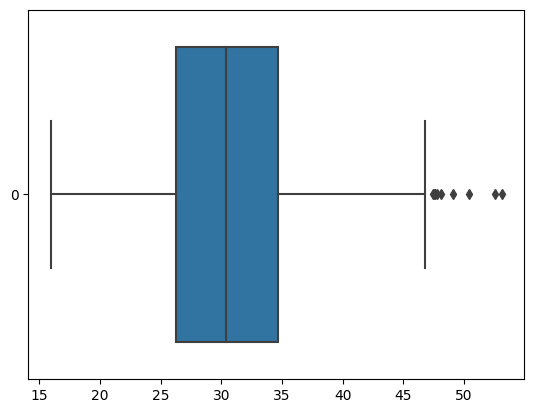

In [18]:
sns.boxplot(df['bmi'], orient='h')

In [19]:
df['bmi'] = np.where(df['bmi']>46, df['bmi'].mean(), df['bmi'])
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

<AxesSubplot: >

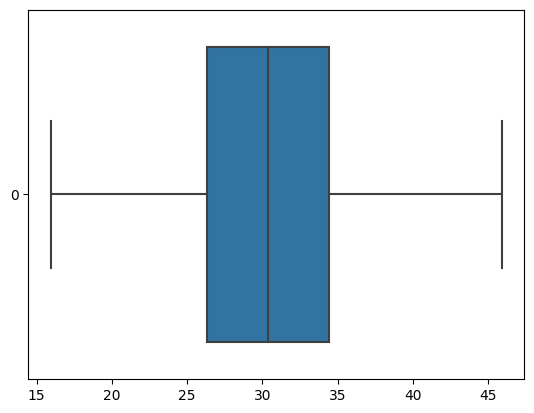

In [20]:
sns.boxplot(df['bmi'], orient='h')

In [21]:
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [22]:
df['smoker'].replace({'no':0,'yes':1}, inplace=True)

In [23]:
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [24]:
df['children']

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

In [25]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [26]:
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [27]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [28]:
df['region'].replace({'southeast':0,'southwest':1,
                      'northwest':2, 'northeast':3}, inplace=True)

In [29]:
df['region']

0       1
1       0
2       0
3       2
4       2
       ..
1333    2
1334    3
1335    0
1336    1
1337    2
Name: region, Length: 1338, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


<AxesSubplot: >

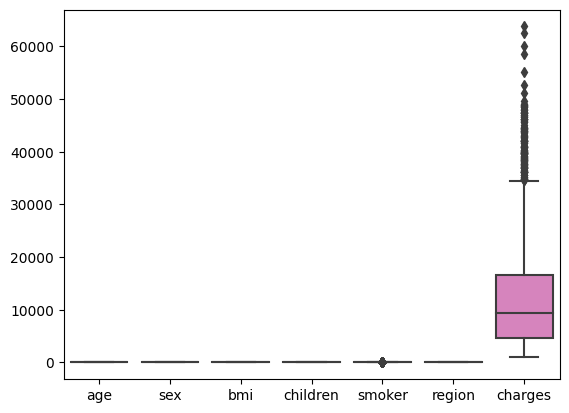

In [32]:
sns.boxplot(df)

In [38]:
corr = df.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.113698,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.042810,0.017163,0.076185,-0.012816,0.057292
bmi,0.113698,0.042810,1.000000,0.006717,-0.000583,-0.240389,0.194611
children,0.042469,0.017163,0.006717,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,-0.000583,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.240389,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.194611,0.067998,0.787251,-0.039473,1.000000


<AxesSubplot: >

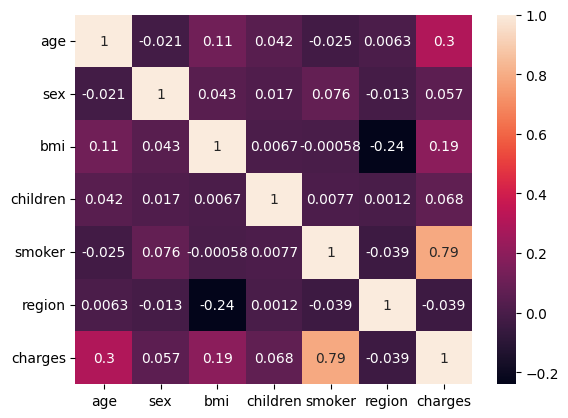

In [39]:
sns.heatmap(corr, annot=True)

# 4. Pre-processing

# Train Test Split

In [40]:
x = df.drop('charges', axis= 1)
y = df['charges']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [42]:
x_train

,age,sex,bmi,children,smoker,region
882,21,0,22.135,0,0,3
505,37,1,30.875,3,0,2
798,58,0,33.100,0,0,1
792,22,0,23.180,0,0,3
201,48,0,32.230,1,0,0
...,...,...,...,...,...,...
466,60,0,28.700,1,0,1
299,48,0,28.880,1,0,2
493,61,1,43.400,0,0,1
527,51,0,25.800,1,0,1


# 5. Model Training/ Building

In [43]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# 6. Model Evaluation

In [44]:
# Training Data Evaluation

y_pred_train = model.predict(x_train)

mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE Train :', mse_train)

rmse_train = np.sqrt(mse_train)
print('RMSE Train :', rmse_train)

mae_train = mean_squared_error(y_train, y_pred_train)
print('MAE Train :', mae_train)

r2_train = r2_score(y_train, y_pred_train)
print('R-Squared Train value :', r2_train)

MSE Train : 36326345.029139765
RMSE Train : 6027.134064307826
MAE Train : 36326345.029139765
R-Squared Train value : 0.7504658709490926


In [45]:
# Testing Data Evaluation

y_pred_test = model.predict(x_test)

mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE Test :', mse_test)

rmse_test = np.sqrt(mse_test)
print('RMSE Test :', rmse_test)

mae_test = mean_squared_error(y_test, y_pred_test)
print('MAE Test :', mae_test)

r2_test = r2_score(y_test, y_pred_test)
print('R-Squared Test value :', r2_test)

MSE Test : 37998711.800277874
RMSE Test : 6164.309515288624
MAE Test : 37998711.800277874
R-Squared Test value : 0.7469801634369309


# Testing on a Single Row

In [46]:
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,1.0
region,1.0


In [47]:
age = 49
sex = 'female'
bmi = 25.7
children = 2
smoker = 'no'
region = 'southeast'

# charges = ?

'southeast':0,'southwest':1,
'northwest':2, 'northeast':3

In [49]:
test_array = np.array([age, 0, 25.7, children, 0, 0], ndmin= 2)
test_array

array([[49. ,  0. , 25.7,  2. ,  0. ,  0. ]])

In [52]:
model.predict(test_array)[0]

9414.46857888401

# -----------------------------------------------------------------------------------------------------------

In [53]:
age = 35
sex = 'female'
bmi = 30
children = 1
smoker = 'yes'
region = 'northeast'

# charges = ?

'''('southeast':0,'southwest':1,
'northwest':2, 'northeast':3)'''

"('southeast':0,'southwest':1,\n'northwest':2, 'northeast':3)"

In [54]:
test_array = np.array([age, 0, bmi, children, 1, 3], ndmin= 2)
test_array

array([[35,  0, 30,  1,  1,  3]])

In [55]:
model.predict(test_array)[0]

31396.26739259611

# -----------------------------------------------------------------------------------------------------------

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
project_data = {'sex': {'female':0, 'male':1},
               'smoker': {'no':0, 'yes':1},
               'region': {'southeast':0,'southwest':1,
                          'northwest':2, 'northeast':3}}
project_data

{'sex': {'female': 0, 'male': 1},
 'smoker': {'no': 0, 'yes': 1},
 'region': {'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3}}

In [58]:
age = eval(input('Enter your Age :'))

sex1 = input('Enter your gender :')
sex = project_data['sex'][sex1]

bmi = eval(input('Enter your bmi :'))

children = int(input('Enter number of childrens :'))

smoker1 = input('Are you Smoker \(yes/no)\ :')
smoker = project_data['smoker'][smoker1]

region1 = input('Enter your Region :')

region = project_data['region'][region1]

final_array = np.array([age, sex, bmi, children, smoker, region], ndmin=2)
charges = np.around(model.predict(final_array)[0],2)

print(f'Medical Charges are : Rs.{charges}')

Enter your Age :27
Enter your gender :male
Enter your bmi :19
Enter number of childrens :0
Are you Smoker \(yes/no)\ :no
Enter your Region :northeast
Medical Charges are : Rs.1133.53


In [59]:
# Creating a pickle file

with open('Linear_Model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [60]:
# Creating a JSON file

with open('Project_data.json', 'w') as g:
    json.dump(project_data, g)